In [1]:
a=(1,2,3,4)
b=(2,3,6,7)

In [2]:
t=0
for i in a:
    if i in b:
        t+=b.count(i)

print(f'p(a|b) = {t/len(a)}')


p(a|b) = 0.5


In [3]:
import numpy as np
from numpy.random import binomial
from scipy.stats import binom
from math import factorial
import matplotlib.pyplot as plt
import random

In [4]:
def my_binomial(n,k,p):
    return (factorial(n)/(factorial(k)*factorial(n-k)))*((p**k)*((1-p)**(n-k)))

$\begin{pmatrix} n\\k \end{pmatrix}p^k\left(1-p\right)^{n-k}=\frac{n!}{k!(n-k)!}p^k\left(1-p\right)^{n-k}$

In [5]:
my_binomial(3,2,0.5)

0.375

In [6]:
dist=binom(3,0.5)
dist.pmf(0)

0.125

In [7]:
dist.cdf(2)

0.875

In [8]:
def cumulative_binomial(n,k,p):
    return sum(my_binomial(n,i,p) for i in range(k+1))

$\displaystyle\sum_{k=0}^k\begin{pmatrix} n\\k \end{pmatrix}p^k\left(1-p\right)^{n-k}$

In [9]:
cumulative_binomial(3,2,0.5)

0.875

In [10]:
# p=0.5
# n=3
# binomial(n,p) # generate random number from binomial distribution with n trials and p probability of success

def binomial_trie(n,p):
    total=0
    for _ in range(n):
        trie=random.choices([0,1],weights=[1-p,p],k=n)
        total+=trie[0]
    return total

In [11]:
def plot_hist_manual(n,p,tries):
    values=[*range(n+1)]
    arr=[]
    for _ in range(tries):
        arr.append(binomial_trie(n,p))
    sim=[arr.count(k)/tries for k in values]
    teorical=[my_binomial(n,k,p) for k in values]
    plt.bar(values,sim,color='r')
    plt.bar(values,teorical,color='b', alpha=0.5)
    plt.title('Binomial distribution manual: teorical vs simulated')
    plt.show()

def plot_hist_automatically(n,p,tries):
    values=[*range(n+1)]
    arr=[]
    for _ in range(tries):
        arr.append(binomial(n,p))
    sim=[arr.count(k)/tries for k in values]
    teorical=[my_binomial(n,k,p) for k in values]
    plt.bar(values,sim,color='r')
    plt.bar(values,teorical,color='b', alpha=0.5)
    plt.title('Binomial distribution automatically: teorical vs simulated')
    plt.show()



p=0.5088392089989289


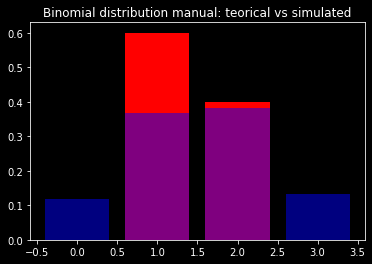

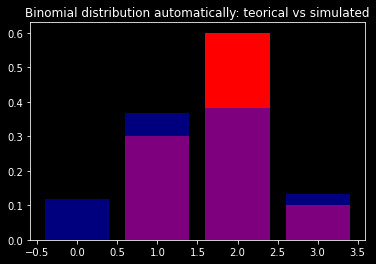

In [16]:
n=3
p=random.uniform(0.48,0.52)
tries=10
print(f'p={p}')
plot_hist_manual(n,p,tries)
plot_hist_automatically(n,p,tries)

In [13]:
binomial_trie(3,0.5)

2

In [14]:
binomial(3,0.5)

2